## Secondary Consumption EDA 2017-2022

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
sstotal = pd.read_excel('sstotal.xlsx')
print(sstotal)

           Date  Donation  REVDonation  Marketing  REVMarketing  Hospitality  \
0    2017-01-01       NaN          NaN        0.0           0.0          0.0   
1    2017-01-02       NaN          NaN        0.0           0.0          0.0   
2    2017-01-03       NaN          NaN        0.0           0.0          0.0   
3    2017-01-04       NaN          NaN        0.0           0.0          0.0   
4    2017-01-05       NaN          NaN        0.0           0.0          0.0   
...         ...       ...          ...        ...           ...          ...   
2186 2022-12-27       0.0          0.0        NaN           NaN          NaN   
2187 2022-12-28       0.0          0.0        NaN           NaN          NaN   
2188 2022-12-29       0.0          0.0        NaN           NaN          NaN   
2189 2022-12-30       0.0          0.0        NaN           NaN          NaN   
2190 2022-12-31       0.0          0.0        NaN           NaN          NaN   

      REVHospitality  CATCold Drinks RE

In [51]:
sstotal.fillna(0, inplace=True)

sstotal.iloc[:, 1:] = sstotal.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_133683/2619520576.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sstotal.iloc[:, 1:] = sstotal.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


In [52]:
sstotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    2191 non-null   datetime64[ns]
 1   Donation                                2191 non-null   float64       
 2   REVDonation                             2191 non-null   float64       
 3   Marketing                               2191 non-null   float64       
 4   REVMarketing                            2191 non-null   float64       
 5   Hospitality                             2191 non-null   float64       
 6   REVHospitality                          2191 non-null   float64       
 7   CATCold Drinks                          2191 non-null   float64       
 8   REVCATCold Drinks                       2190 non-null   float64       
 9   CATHot Drinks                           2191 non-nul

In [53]:
# Split the columns into three parts: catering, retail, and revenue
catering_cols = sstotal.filter(regex='^CAT')
retail_cols = sstotal.filter(regex='^RT')
revenue_cols = sstotal.filter(regex='^REV')
catering_revenue_cols = sstotal.filter(regex='^REVCAT')
retail_revenue_cols = sstotal.filter(regex='^REVRT')


print("Catering columns:")
print(catering_cols.columns.tolist())
print()

print("Retail columns:")
print(retail_cols.columns.tolist())
print()

print("Revenue columns:")
print(revenue_cols.columns.tolist())
print()
print("Catering revenue columns:")
print(catering_revenue_cols.columns.tolist())
print()

print("Retail revenue columns:")
print(retail_revenue_cols.columns.tolist())

Catering columns:
['CATCold Drinks', 'CATHot Drinks', 'CATIce Cream', 'CATIn Hse Prepared Food Standard', 'CATOrder Options', 'CATPurchased Food Crisps', 'CATPurchased Food Standard Rate', 'CATPurchasedFoodZero', 'CATAlcohol/Bar sales Paignton']

Retail columns:
['RTSweets', 'RTRetail', 'RTBattery', 'RTBooks', 'RTCampaign', 'RTFWChildren', 'RTGifts (Food ZR)', 'RTGifts', 'RTBespoke', 'RTClothing', 'RTJewellery', 'RTMugs', 'RTPlush', 'RTGuides', 'RTTYQGuides', 'RTChildren clothes', 'RTGreat Big Rhino Project Figurines', 'RTPostage', 'RTRhino Guide']

Revenue columns:
['REVDonation', 'REVMarketing', 'REVHospitality', 'REVCATCold Drinks', 'REVCATHot Drinks', 'REVCATIce Cream', 'REVCATPreparedFood', 'REVCATOrder Options', 'REVCATPurchased Food Crisps', 'REVCATPurchased Food Standard Rate', 'REVCATPurchasedFoodZero', 'REVCATAlcohol/Bar sales Paignton', 'REVRTSweets', 'REVRTRetail', 'REVRTBattery', 'REVRTBooks', 'REVRTCampaign', 'REVRTFW Children', 'REVRTGifts (Food ZR)', 'REVRTGifts', 'REVR

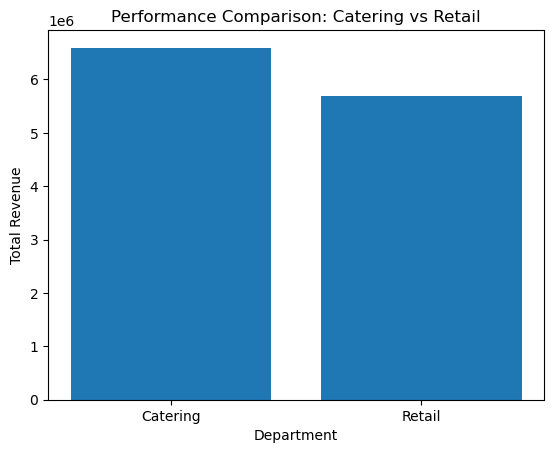

In [54]:
# Calculate the total revenue for each department
catering_revenue = sstotal.filter(regex='^REVCAT').sum().sum()
retail_revenue = sstotal.filter(regex='^REVRT').sum().sum()

departments = ['Catering', 'Retail']
revenues = [catering_revenue, retail_revenue]

plt.bar(departments, revenues)
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.title('Performance Comparison: Catering vs Retail')
plt.show()

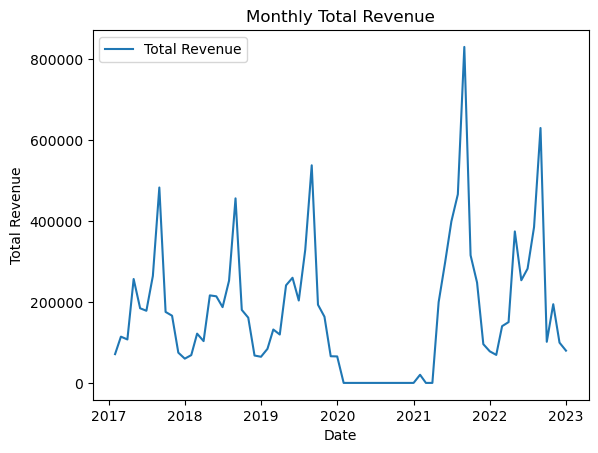

In [55]:
# Resample the DataFrame to a monthly frequency
monthly_total_revenue = sstotal.resample('M', on='Date')['REVTotal'].sum()

plt.plot(monthly_total_revenue.index, monthly_total_revenue, label='Total Revenue')

plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Monthly Total Revenue')
plt.legend()
plt.show()

In [56]:
sstotal['Date'] = pd.to_datetime(sstotal['Date'])

sstotal.set_index('Date', inplace=True)

sstotal_monthly = sstotal['REVTotal'].resample('M').mean()

print(sstotal_monthly)

Date
2017-01-31     2292.228065
2017-02-28     4078.831071
2017-03-31     3462.045484
2017-04-30     8551.911667
2017-05-31     5945.832258
                  ...     
2022-08-31    20305.119677
2022-09-30     3384.620333
2022-10-31     6267.773548
2022-11-30     3314.756000
2022-12-31     2569.660323
Freq: M, Name: REVTotal, Length: 72, dtype: float64


<AxesSubplot:title={'center':'Monthly SS'}, xlabel='Date'>

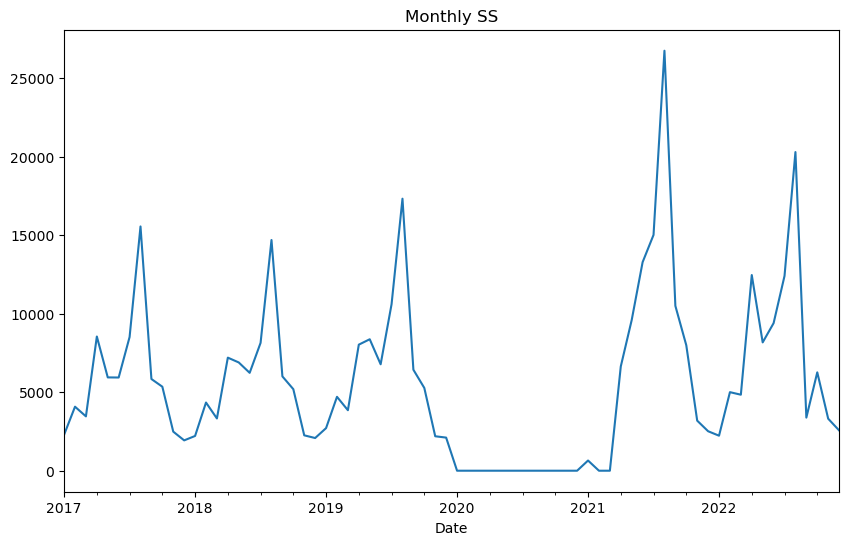

In [57]:
sstotal_monthly.plot(figsize=(10, 6), title='Monthly SS')

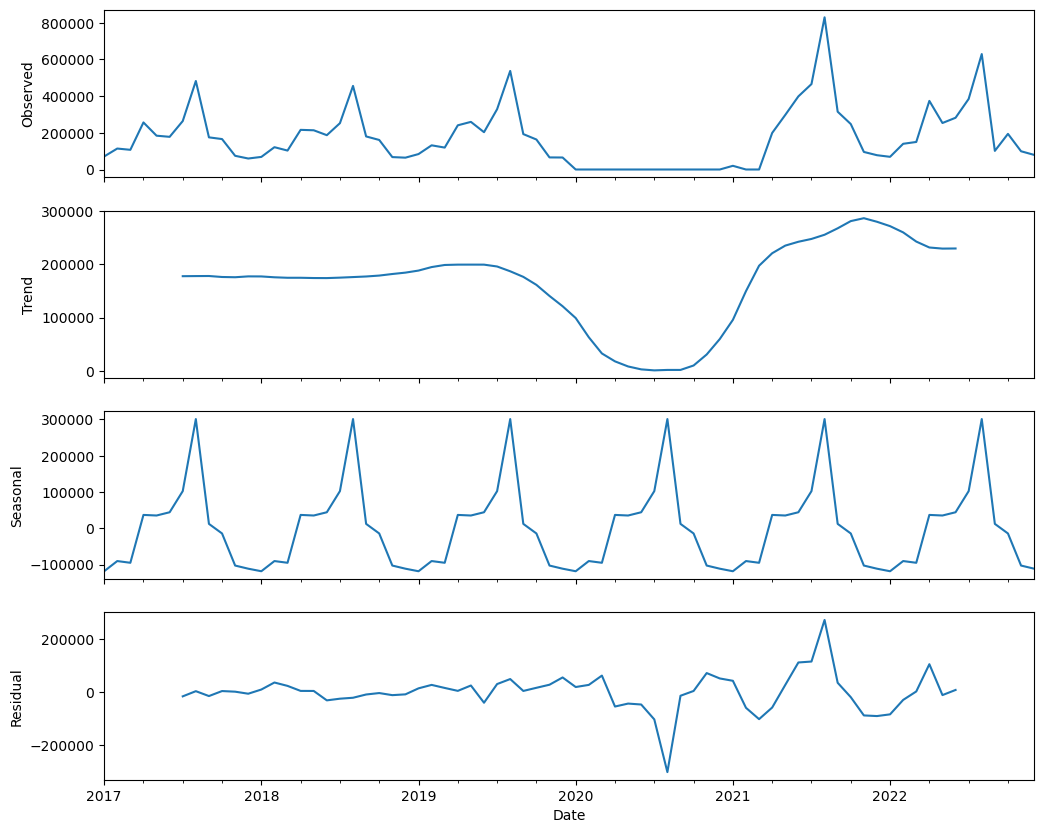

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the monthly footfall time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(monthly_total_revenue, model='additive')

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

In [59]:
sstotal.reset_index(level=0, inplace=True)


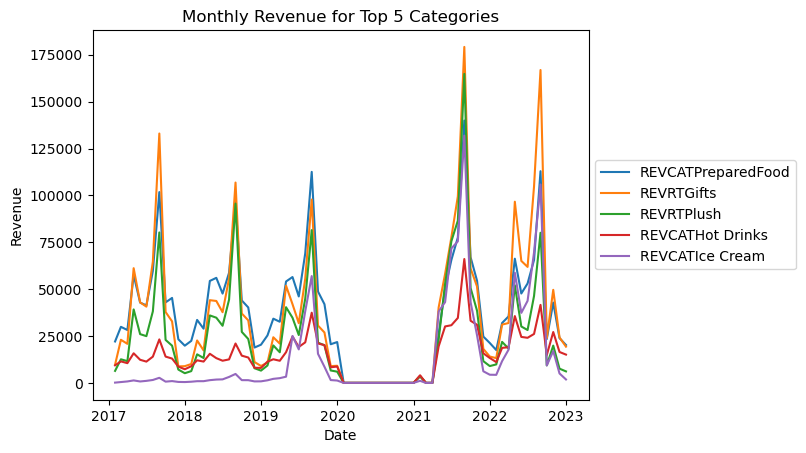

In [60]:
rev_columns = [col for col in sstotal.columns if col.startswith('REV') and col != 'REVTotal']

monthly_data = sstotal.resample('M', on='Date')[rev_columns].sum()

total_revenue = monthly_data.sum()

# Sort the categories by total revenue and select the top 5
top_rev_columns = total_revenue.sort_values(ascending=False).head(5).index


for col in top_rev_columns:
    plt.plot(monthly_data.index, monthly_data[col], label=col)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Monthly Revenue for Top 5 Categories')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # position the legend outside the plot area
plt.show()

In [61]:
peak_date = monthly_data.idxmax()
print(peak_date)

REVDonation                              2022-03-31
REVMarketing                             2019-04-30
REVHospitality                           2017-01-31
REVCATCold Drinks                        2022-08-31
REVCATHot Drinks                         2021-08-31
REVCATIce Cream                          2021-08-31
REVCATPreparedFood                       2021-08-31
REVCATOrder Options                      2021-12-31
REVCATPurchased Food Crisps              2021-08-31
REVCATPurchased Food Standard Rate       2017-08-31
REVCATPurchasedFoodZero                  2022-06-30
REVCATAlcohol/Bar sales Paignton         2017-07-31
REVRTSweets                              2021-08-31
REVRTRetail                              2017-11-30
REVRTBattery                             2017-08-31
REVRTBooks                               2021-08-31
REVRTCampaign                            2017-08-31
REVRTFW Children                         2022-06-30
REVRTGifts (Food ZR)                     2017-08-31
REVRTGifts  

In [62]:
#add binary variables for each items when peak
items = peak_date.index
for item in items:
    peak_time = peak_date[item]
    monthly_data[item+'_peak'] = monthly_data.index.map(lambda x: 1 if x == peak_time else 0)
monthly_data

,REVDonation,REVMarketing,REVHospitality,REVCATCold Drinks,REVCATHot Drinks,REVCATIce Cream,REVCATPreparedFood,REVCATOrder Options,REVCATPurchased Food Crisps,REVCATPurchased Food Standard Rate,...,REVRTClothing_peak,REVRTJewellery_peak,REVRTMugs_peak,REVRTPlush_peak,REVRTGuides_peak,REVRTTYQGuides_peak,REVRTChildren clothes_peak,REVRTGreat Big Rhino Project Figurines_peak,REVRTPostage_peak,REVRTRhino Guide_peak
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,0.0,0.0,0.0,4853.81,9356.65,145.65,22082.74,0.00,162.04,8052.92,...,0,0,0,0,0,0,0,0,0,0
2017-02-28,0.0,0.0,0.0,7820.72,11467.10,444.70,29896.18,0.00,253.00,13921.41,...,0,0,0,0,0,0,0,0,0,0
2017-03-31,0.0,0.0,0.0,7377.17,10515.59,771.53,28198.64,0.00,336.72,12571.59,...,0,0,0,0,0,0,0,0,0,1
2017-04-30,0.0,509.5,0.0,13470.30,15786.59,1314.44,57531.26,0.00,1694.07,23395.38,...,0,0,0,0,0,1,0,0,0,0
2017-05-31,0.0,0.0,0.0,10258.54,12319.88,760.73,42820.56,0.00,1397.77,17825.21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.0,0.0,0.0,58813.29,41609.84,105820.49,112908.43,11.92,3528.25,31057.46,...,0,0,0,0,0,0,0,0,0,0
2022-09-30,0.0,0.0,0.0,7790.42,14836.98,9302.49,23372.02,9.67,784.08,7556.88,...,0,0,0,0,0,0,0,0,0,0
2022-10-31,0.0,0.0,0.0,13996.65,27125.56,16990.44,42863.13,8.02,1250.66,14145.35,...,0,0,0,0,0,0,0,0,0,0


## Weather & Secondary Consumption Analysis


In [63]:
wtotal = pd.read_excel('WeatherFinal.xlsx')
print(wtotal)

           Date  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0    2017-01-01      8.4      3.4   6.2           5.1          -2.5   
1    2017-01-02      5.0     -0.5   2.5           1.1          -3.4   
2    2017-01-03      5.7     -1.0   2.4           3.3          -3.4   
3    2017-01-04      7.1      4.3   5.6           5.1           0.1   
4    2017-01-05      5.9      2.2   3.8           3.1          -1.1   
...         ...      ...      ...   ...           ...           ...   
2186 2022-12-27     10.4      5.6   8.3          10.4           1.8   
2187 2022-12-28     11.2      8.6   9.8          11.2           4.2   
2188 2022-12-29      8.8      6.3   7.3           4.2           1.7   
2189 2022-12-30     11.2      8.3   9.8          11.2           4.0   
2190 2022-12-31     11.7      9.4  10.6          11.7           5.5   

      feelslike   dew  humidity  precip  ...  snowdepth  windgust windspeed  \
0           2.2   5.3      93.7   7.550  ...          0      57.6   

### Retail department

In [64]:
retail_revenue_col_names = retail_revenue_cols.columns.tolist()

retail_revenue_col_names.append('Date')

sstotal_retail = sstotal[retail_revenue_col_names]

print(sstotal_retail.head())

   REVRTSweets  REVRTRetail  REVRTBattery  REVRTBooks  REVRTCampaign  \
0          NaN          0.0          0.00         NaN            NaN   
1        68.11          0.0          3.99       83.75         247.24   
2        48.91          0.0         12.99       35.42         106.02   
3        17.96          0.0          0.00        3.99         120.76   
4        34.77          0.0          0.00       12.07          60.88   

   REVRTFW Children  REVRTGifts (Food ZR)  REVRTGifts  REVRTBespoke  \
0               0.0                   NaN         NaN           NaN   
1               0.0                 17.37      797.60        108.77   
2               0.0                  5.98      426.33         73.73   
3               0.0                  0.00      140.56         10.48   
4               0.0                  0.00       92.08         21.65   

   REVRTClothing  REVRTJewellery  REVRTMugs  REVRTPlush  REVRTGuides  \
0            NaN             NaN        0.0         NaN          NaN

In [65]:
# Merge sstotal_retail and weather
mergedretailrev = pd.merge(sstotal_retail, wtotal, on='Date')

print(mergedretailrev.head())

   REVRTSweets  REVRTRetail  REVRTBattery  REVRTBooks  REVRTCampaign  \
0          NaN          0.0          0.00         NaN            NaN   
1        68.11          0.0          3.99       83.75         247.24   
2        48.91          0.0         12.99       35.42         106.02   
3        17.96          0.0          0.00        3.99         120.76   
4        34.77          0.0          0.00       12.07          60.88   

   REVRTFW Children  REVRTGifts (Food ZR)  REVRTGifts  REVRTBespoke  \
0               0.0                   NaN         NaN           NaN   
1               0.0                 17.37      797.60        108.77   
2               0.0                  5.98      426.33         73.73   
3               0.0                  0.00      140.56         10.48   
4               0.0                  0.00       92.08         21.65   

   REVRTClothing  ...  snowdepth  windgust  windspeed  winddir  \
0            NaN  ...          0      57.6       36.2    322.4   
1       

In [66]:
mergedretailrev.columns

Index(['REVRTSweets', 'REVRTRetail', 'REVRTBattery', 'REVRTBooks',
       'REVRTCampaign', 'REVRTFW Children', 'REVRTGifts (Food ZR)',
       'REVRTGifts', 'REVRTBespoke', 'REVRTClothing', 'REVRTJewellery',
       'REVRTMugs', 'REVRTPlush', 'REVRTGuides', 'REVRTTYQGuides',
       'REVRTChildren clothes', 'REVRTGreat Big Rhino Project Figurines',
       'REVRTPostage', 'REVRTRhino Guide', 'Date', 'tempmax', 'tempmin',
       'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

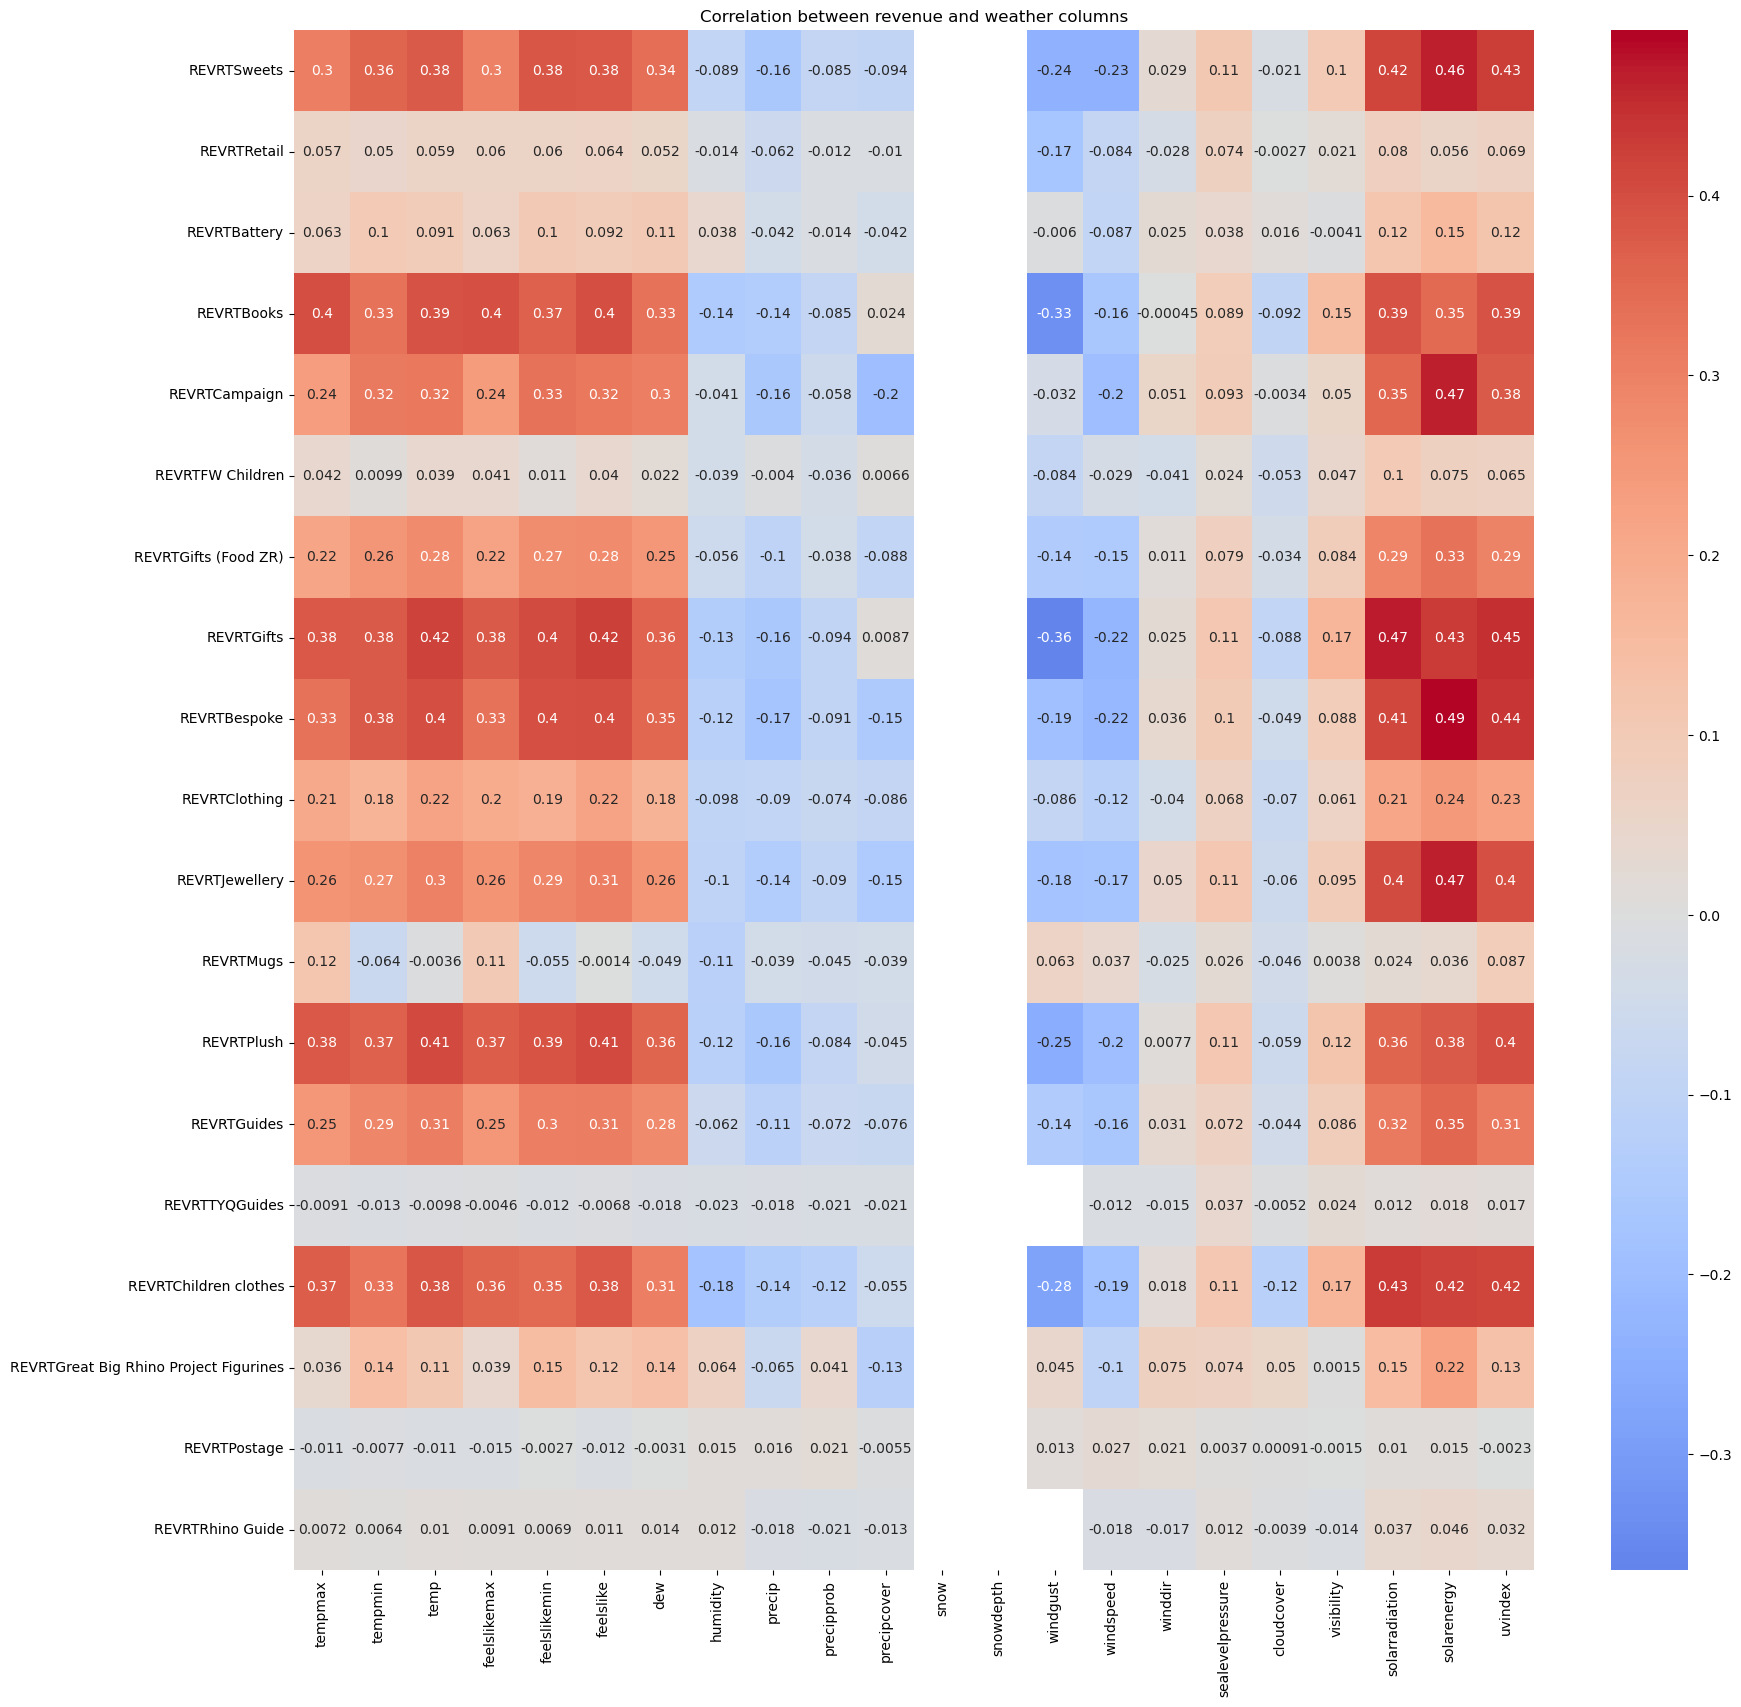

In [67]:
correlations = pd.DataFrame()
rev_cols = ['REVRTSweets', 'REVRTRetail', 'REVRTBattery', 'REVRTBooks',
       'REVRTCampaign', 'REVRTFW Children', 'REVRTGifts (Food ZR)',
       'REVRTGifts', 'REVRTBespoke', 'REVRTClothing', 'REVRTJewellery',
       'REVRTMugs', 'REVRTPlush', 'REVRTGuides', 'REVRTTYQGuides',
       'REVRTChildren clothes', 'REVRTGreat Big Rhino Project Figurines',
       'REVRTPostage', 'REVRTRhino Guide']
weather_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 
                'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 
                'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 
                'solarradiation', 'solarenergy', 'uvindex']

for rev_col in rev_cols:
    for weather_col in weather_cols:
        correlations.loc[rev_col, weather_col] = mergedretailrev[rev_col].corr(mergedretailrev[weather_col])

plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between revenue and weather columns')
plt.show()

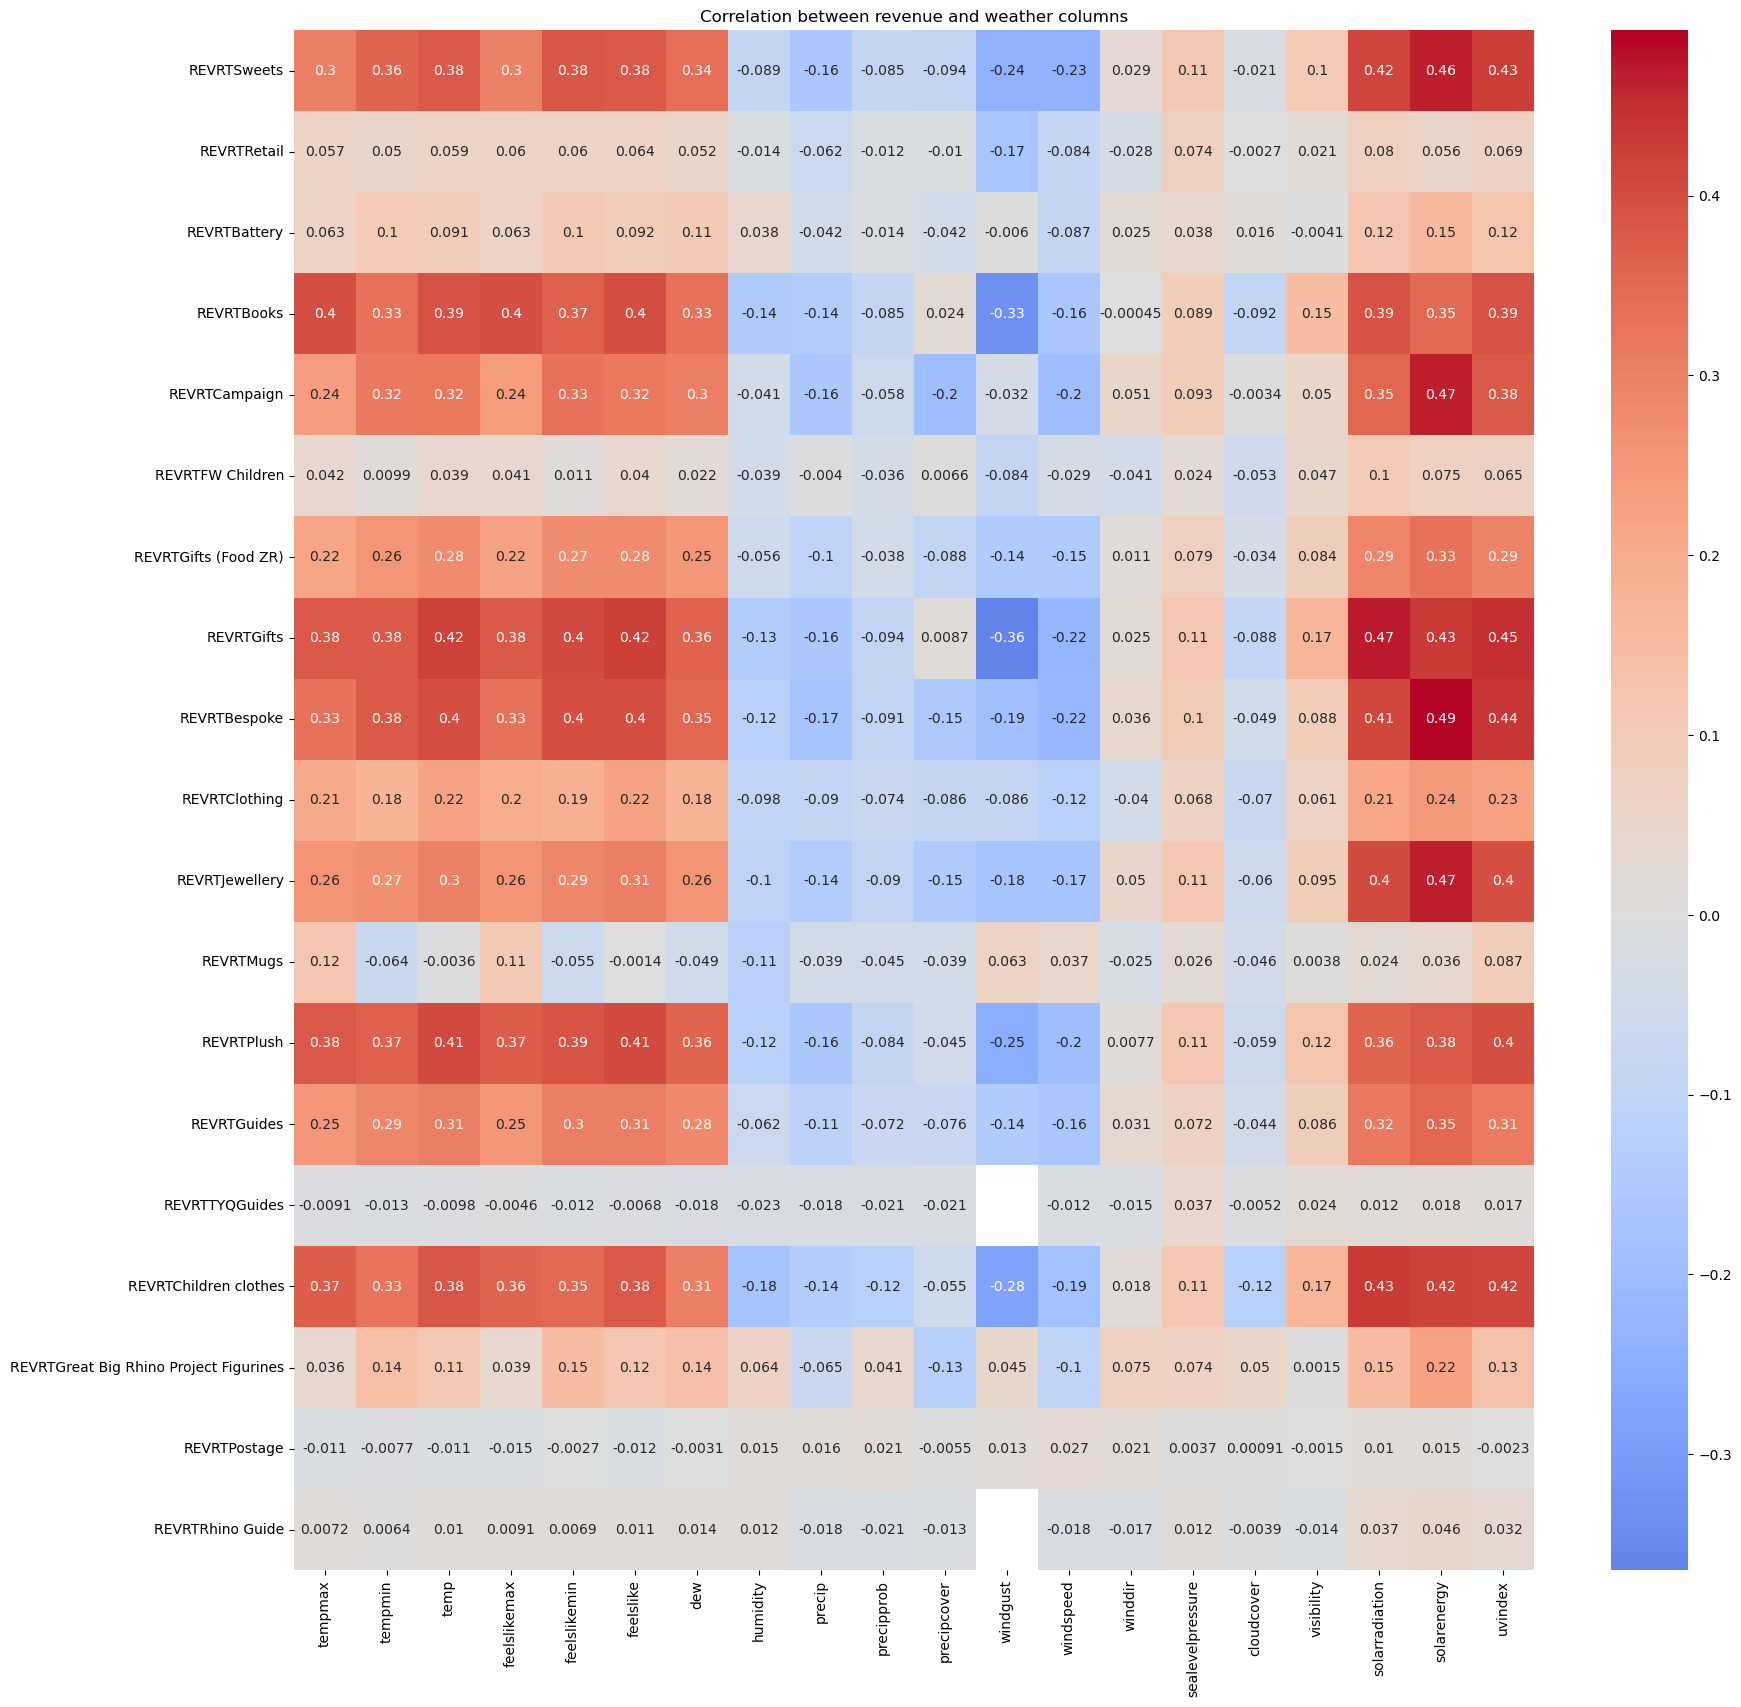

In [68]:
mergedretailrev = mergedretailrev.drop(['snow','snowdepth'],axis=1)
weather_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 
                'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                'precipcover', 'windgust', 'windspeed', 
                'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 
                'solarradiation', 'solarenergy', 'uvindex']
correlations = pd.DataFrame()
for rev_col in rev_cols:
    for weather_col in weather_cols:
        correlations.loc[rev_col, weather_col] = mergedretailrev[rev_col].corr(mergedretailrev[weather_col])

plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between revenue and weather columns')
plt.show()

### Catering Department


In [69]:
catering_revenue_col_names = catering_revenue_cols.columns.tolist()

catering_revenue_col_names.append('Date')

sstotal_catering = sstotal[catering_revenue_col_names]

print(sstotal_catering.head())

   REVCATCold Drinks  REVCATHot Drinks  REVCATIce Cream  REVCATPreparedFood  \
0                NaN               NaN              NaN                 NaN   
1             457.85            796.67              0.0             2269.64   
2             194.67            524.09              0.0              966.96   
3             102.50            261.05              0.0              544.45   
4             165.01            386.62              1.9              705.46   

   REVCATOrder Options  REVCATPurchased Food Crisps  \
0                  NaN                          NaN   
1                  0.0                         8.56   
2                  0.0                         2.84   
3                  0.0                         1.52   
4                  0.0                         9.12   

   REVCATPurchased Food Standard Rate  REVCATPurchasedFoodZero  \
0                                 NaN                      0.0   
1                              674.07                      0.0

In [70]:
# Merge 
mergedcateringrev = pd.merge(sstotal_catering, wtotal, on='Date')

print(mergedcateringrev.head())

   REVCATCold Drinks  REVCATHot Drinks  REVCATIce Cream  REVCATPreparedFood  \
0                NaN               NaN              NaN                 NaN   
1             457.85            796.67              0.0             2269.64   
2             194.67            524.09              0.0              966.96   
3             102.50            261.05              0.0              544.45   
4             165.01            386.62              1.9              705.46   

   REVCATOrder Options  REVCATPurchased Food Crisps  \
0                  NaN                          NaN   
1                  0.0                         8.56   
2                  0.0                         2.84   
3                  0.0                         1.52   
4                  0.0                         9.12   

   REVCATPurchased Food Standard Rate  REVCATPurchasedFoodZero  \
0                                 NaN                      0.0   
1                              674.07                      0.0

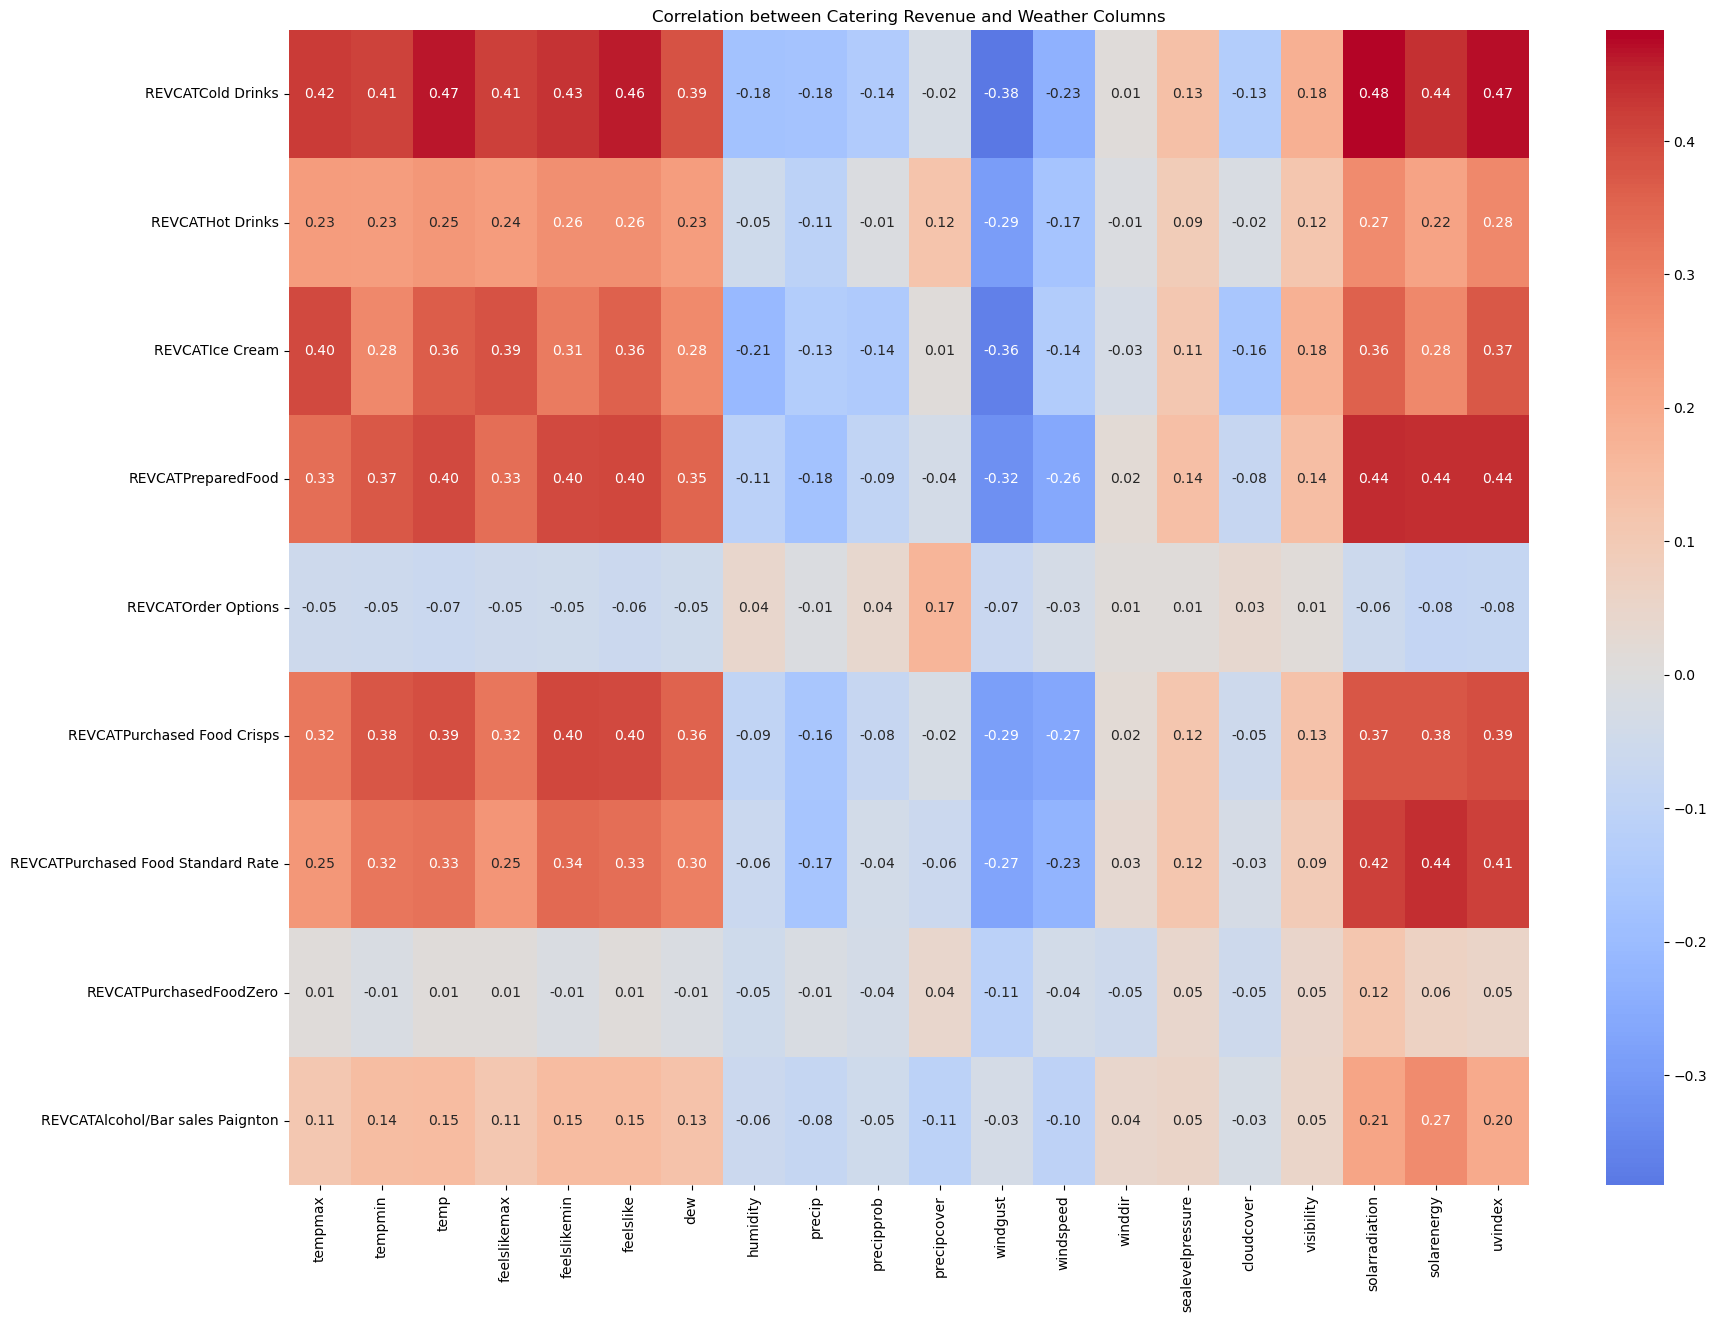

In [71]:
catering_rev_cols = [col for col in mergedcateringrev.columns if col.startswith('REV')]

weather_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 
                'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                'precipcover', 'windgust', 'windspeed', 
                'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 
                'solarradiation', 'solarenergy', 'uvindex']

catering_correlations = pd.DataFrame()

for rev_col in catering_rev_cols:
    for weather_col in weather_cols:
        catering_correlations.loc[rev_col, weather_col] = mergedcateringrev[rev_col].corr(mergedcateringrev[weather_col])

plt.figure(figsize=(20, 15))
sns.heatmap(catering_correlations, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation between Catering Revenue and Weather Columns')
plt.show()